In [47]:
#Importing the required libraries/functions
import numpy as np
import networkx as nx
from networkx.algorithms.community import modularity
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [48]:
# Changing printing options using Numpy and Pandas
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Calling the Karate Club Graph from the networkx library and printing it
G = nx.karate_club_graph()
print(G)

# Defining a function that takes a graph and it's edges as parameters and returns the adjacency matrix (unweighted) of that graph
def adjacency_matrix(G, edges):
  nodes = G.nodes()
  n = len(nodes)
  A = np.zeros((n,n))

  node_to_index = {node: i for i, node in enumerate(nodes)}

  for (u, v) in edges:
    i = node_to_index[u]
    j = node_to_index[v]
    A[i][j] = A[j][i] = 1

  return A

A = adjacency_matrix(G,G.edges())
print("Adjacency Matrix of the Karate Club Graph:\n", pd.DataFrame(A))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
Adjacency Matrix of the Karate Club Graph:
      0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0   0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0   
1   1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2   1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
3   1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
4   1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
5   1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
6   1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7   1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8   1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10

The adjacency_matrix function initialises an n x n zero matrix (where n is the number of nodes in the graph) and loops through all the edges in the graph. If there exists an edge between the ith and jth nodes, then both A[i][j] and A[j][i] are set to 1.

The 'node_to_index' segment gives rise to a dictionary where each key-value pair is a node and it's corresponding index, which is the assigned to that node based on it's position in the list of nodes of the graph/subgraph. This is particularly useful when dealing with subgraphs, since the node labels might not always be sequential numbers starting from 0.

Note:- The code segment involving np.set_printoptions and pd.set_option is optional and not really needed. I used this to avoid the truncation of values when the matrix gets printed, so that it gets shown in it's entirety. Also, I used pd.DataFrame to print the matrix in a clear tabular form, which is again not required.

In [49]:
# Function that takes in a graph as a parameter and returns the modularity matrix of the same graph
def modularity_matrix(G):
  l=[]
  for i in G.nodes():
      l.append(nx.degree(G,i))
  n = len(G.nodes())
  k = np.array(l).reshape(n,1)

  A = adjacency_matrix(G, G.edges())
  m = G.number_of_edges()
  if m == 0:
    B = A
  else:
    B = A - ((k @ k.T)/(2 * m))
  B_df = pd.DataFrame(B)
  return np.round(B_df, 3)

print(modularity_matrix(G))

       0      1      2      3      4      5      6      7      8      9   \
0  -1.641  0.077 -0.026  0.385  0.692  0.590  0.590  0.590  0.487 -0.205   
1   0.077 -0.519  0.423  0.654 -0.173 -0.231 -0.231  0.769 -0.288 -0.115   
2  -0.026  0.423 -0.641  0.615 -0.192 -0.256 -0.256  0.744  0.679  0.872   
3   0.385  0.654  0.615 -0.231 -0.115 -0.154 -0.154  0.846 -0.192 -0.077   
4   0.692 -0.173 -0.192 -0.115 -0.058 -0.077  0.923 -0.077 -0.096 -0.038   
5   0.590 -0.231 -0.256 -0.154 -0.077 -0.103  0.897 -0.103 -0.128 -0.051   
6   0.590 -0.231 -0.256 -0.154  0.923  0.897 -0.103 -0.103 -0.128 -0.051   
7   0.590  0.769  0.744  0.846 -0.077 -0.103 -0.103 -0.103 -0.128 -0.051   
8   0.487 -0.288  0.679 -0.192 -0.096 -0.128 -0.128 -0.128 -0.160 -0.064   
9  -0.205 -0.115  0.872 -0.077 -0.038 -0.051 -0.051 -0.051 -0.064 -0.026   
10  0.692 -0.173 -0.192 -0.115  0.942  0.923 -0.077 -0.077 -0.096 -0.038   
11  0.897 -0.058 -0.064 -0.038 -0.019 -0.026 -0.026 -0.026 -0.032 -0.013   
12  0.795 -0

The modularity_matrix function initialises a list, which stores the degrees of all the nodes and then gets reshaped into a column vector of shape (n,1) where n is the number of nodes. The modularity matrix is then computed using the formula B = A - (k x k^T)/2m, where A is the adjacency matrix and m the number of edges in the graph. If m turns out to be zero, then I set B to be equal to A which in turn will be equal to the zero matrix.

In [50]:
mod_value = 0
communities = [{x for x in range(np.shape(A)[0])}]
print(communities)
iter = 0            # Initialised to 0

deg_centrality = {}
betw_centrality = {}
close_centrality = {}
cluster_coefficient = {}

# Function to compute cen
def calculate_parameters():
  deg_centrality[iter] = []
  betw_centrality[iter] = []
  close_centrality[iter] = []
  cluster_coefficient[iter] = []

  for comm in communities:
        comm_graph = G.subgraph(list(comm)).copy()

        # Calculate all metrics once for the entire subgraph
        dc = nx.degree_centrality(comm_graph)
        bc = nx.betweenness_centrality(comm_graph)
        cc = nx.closeness_centrality(comm_graph)
        cl = nx.clustering(comm_graph)

        # Iterate over the nodes inside the community
        for node in comm:
            # Append the metric for the specific node
            deg_centrality[iter].append(dc.get(node)) # Use .get to safely handle missing keys if G is strange
            betw_centrality[iter].append(bc.get(node))
            close_centrality[iter].append(cc.get(node))
            cluster_coefficient[iter].append(cl.get(node))

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]


mod_value :- When we begin clustering, the communities list constains a set storing all nodes, i.e., all the nodes form one cluster. Hence modularity value is 0, since no split has been found.

We then create 4 empty dictionaries and store the values of all 4 metrics. The function goes through each cluster(comm) in the communities list. For each cluster, a subgraph is created and the NetworkX functions degree_centrality, betweenness_centrality, closeness_centrality and clustering are used to calculate the corresponding spectral metric for each node in that cluster and return them as dictionaries.

Each spectral metric calculated for a particular node is appended to the corresponding dictionary's list whose key is the current iteration number. By doing so, we ensure that at the end, we have four dictionaries, each containing values as lists of 34 entries for the 34 nodes in the Karate Club Graph.

In [51]:
def validate_partition(G, communities):
  # Check if communities form a valid partition
    all_nodes = set(G.nodes())
    partitioned_nodes = set()

    for comm in communities:
        partitioned_nodes = partitioned_nodes | set(comm)

    # Check for missing nodes
    if partitioned_nodes != all_nodes:
        print(f"Missing nodes: {all_nodes - partitioned_nodes}")
        return False

    # Check for overlapping communities
    total_size = sum(len(comm) for comm in communities)
    if total_size != len(all_nodes):
        print(f"Overlap detected: total community size {total_size} != total nodes {len(all_nodes)}")
        return False

    # Check for duplicates within communities
    for i, comm in enumerate(communities):
        if len(comm) != len(set(comm)):
            print(f"Duplicate nodes in community {i}: {comm}")
            return False

    return True

Here, the function first iterates through the communities list and takes the union operator to aggregate the nodes present in the current communities. It returns False in the case of missing nodes, overlapping communities, or presence of duplicates within a particular community, otherwise it returns True.

Note:- This function was defined as a safety check to determine whether the communities present currently form a proper partition of the Karate Club Graph. It is therefore not a necessary inclusion and can be discarded.

In [52]:
def spectral_split_community(cluster):
  global mod_value

  splittable_clusters.remove(cluster)
  communities.remove(set(cluster))

  subgraph = G.subgraph(cluster)
  if subgraph.number_of_edges() == 0:
    communities.append(set(cluster))
    return False
  else:
    A_c= adjacency_matrix(subgraph, subgraph.edges())
    B_c= modularity_matrix(subgraph)

    B_c_vals, B_c_vecs = np.linalg.eig(B_c)
    B_c_eigenval = np.max(B_c_vals)
    B_c_eigenvec = B_c_vecs[:, np.argmax(B_c_vals)]

    if B_c_eigenval > 0:
      pos_indices = np.where(B_c_eigenvec > 0)[0]
      npos_indices = np.where(B_c_eigenvec <= 0)[0]
      cluster1 = [cluster[i] for i in pos_indices]
      cluster2 = [cluster[i] for i in npos_indices]

      if cluster1 == [] or cluster2 == []:
        communities.append(set(cluster))
        return False
      else:
        communities.append(set(cluster1))
        communities.append(set(cluster2))
        splittable_clusters.append(cluster1)
        splittable_clusters.append(cluster2)
        nmod_value = modularity(G,communities)

        if nmod_value < mod_value:
          splittable_clusters.remove(cluster1)
          splittable_clusters.remove(cluster2)
          communities.remove(set(cluster1))
          communities.remove(set(cluster2))
          communities.append(set(cluster))
          return False
        else:
          mod_value = nmod_value
          return True
    else:
      communities.append(set(cluster))
      return False

Inside this function, we first globalise the 'mod_value' variable and remove the input list from both the 'communities' list and the 'splittable_communities' list. The 'splittable_communities' list stores all the candidate clusters, i.e clusters that can potentially be split to give rise to smaller clusters. The program gets executed until the candidate_clusters becomes an empty list.

An adjacency matrix and modularity matrix specific to the subgraph (cluster) being analysed are generated, and eigenvalue decomposition is performed on the modularity matrix. The largest eigenvalue and it's corresponding eigenvector are then determined. (Note:- The matrices are not computed if the cluster in consideration has no edges, in that case the cluster is simply added back to the 'communities' list, and the function returns False.)

A cluster is considered splittable only if it's largest eigenvalue is positive, else the function returns False and that cluster is added back to the 'communities' list. If the largest eigenvalue is positive, then split the cluster into 2 groups, one containing all nodes whose corresponding entry in the eigenvector is positive, the other containing those nodes whose corresponding entry is non-positive (zero or negative). If any of these groups is empty, it implies the cluster can't be split further, so the cluster gets added back to the 'communities' list and the function returns False.

The variable 'nmod value' calculates the modularity of the entire graph G with the new partition. If it's less than the previous value, the split is discarded. All lists are reverted to their state before the split was attempted, and the function returns False.

If all these conditions are met, the newly-formed clusters are added to both 'communities' and 'splittable_communities', and the modularity value is updated.

In [53]:
def plot(G):
  colour_map = {}
  colours = []
  print("Iteration ", iter)
  for i,comm in enumerate(communities):
    for node in comm:
      colour_map[node] = i
  for node in G.nodes():
    colours.append(colour_map[node])
  pos_arrangement = nx.spring_layout(G, seed=3)
  nx.draw(G, pos_arrangement, with_labels=True, node_color=colours, cmap=plt.cm.tab10)
  plt.show()

The colour_map dictionary ensures that all nodes belonging to a particular cluster share the same colour. I then defined a list 'colours' that stores the colour indices of all nodes by using the previously created colour_map. I then plotted a graph where all nodes are displayed with their node number and all nodes belonging to the same cluster are displayed using the same colour.

Iteration  0


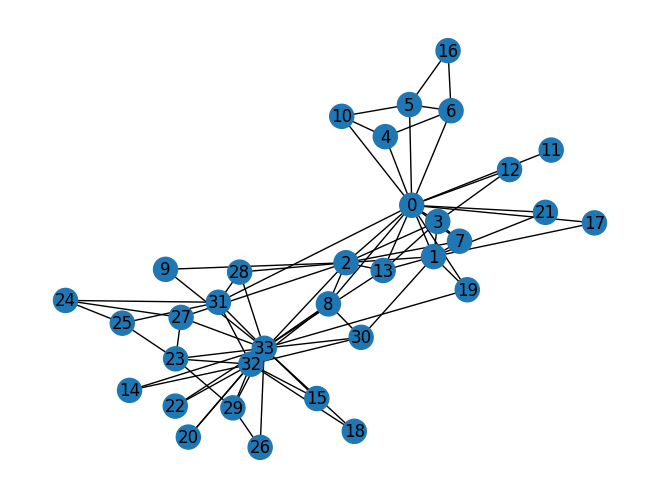

Iteration  1


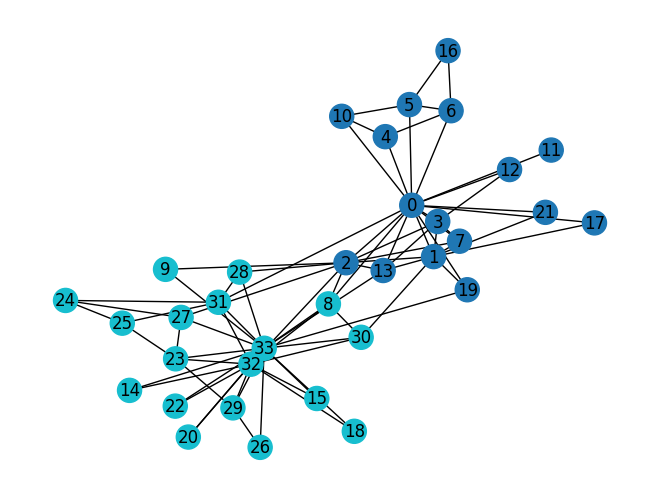

Iteration  2


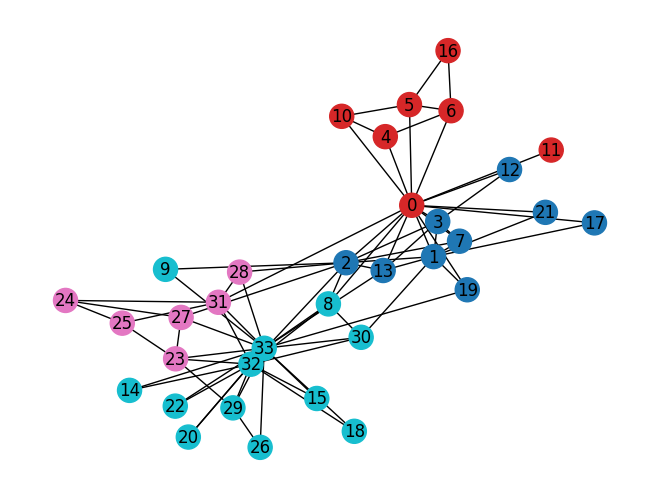

Iteration  3


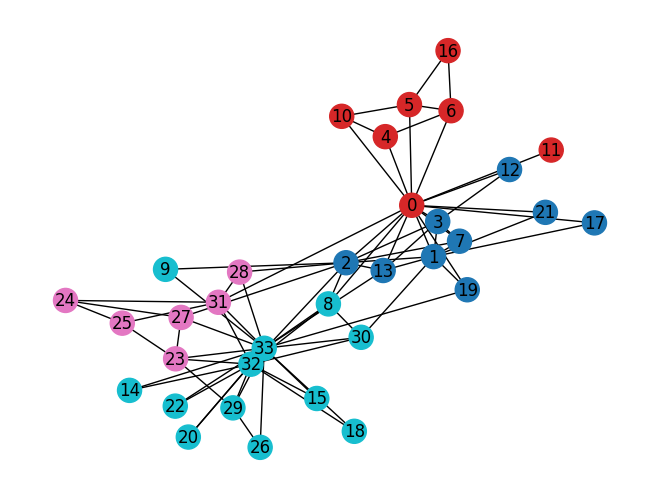

Number of identified clusters: 4


In [54]:
iter = 0
# The initial cluster contains all nodes as a list (as required by your current spectral_split_community function).
splittable_clusters = [list(i for i in range(G.number_of_nodes()))]

calculate_parameters()
plot(G)

'''print("Iteration 0")
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize = (10,7))
nx.draw(G, pos, with_labels=True)
plt.show()'''

while len(splittable_clusters) > 0:
  current_clusters = splittable_clusters.copy()
  global iter
  iter = iter + 1
  split = False

  for i in current_clusters:
    if i in splittable_clusters:
      if spectral_split_community(i):
        split = True

  if split == True or iter > 0:
    plot(G)
    calculate_parameters()

  if not validate_partition(G, communities):
        print("ERROR: Invalid partition before split!")
        break
print("Number of identified clusters:", len(communities))

I first initialise the iteration counter (iter), and then initialise 'splittable_communities' to be a list containing a list that has all the values in between 0 and iter (both inclusive). I then call the functions 'calculate_parameters()' and 'plot(G)' to record and visualize the graph's initial state before any splitting has occurred.

In the loop, I first created a copy of 'splittable_clusters' (since it's going to be subjected to modification as the program runs), globalised the iter variable and increased the value of iter by 1 for the new state. I have also  defined a flag variable called 'split' that tracks if there was atleast one successful split in this iteration. Initially, 'split' is set to False.

The next loop attempts to split every cluster that was a member of the candidate clusters at the start of the current iteration. If the split is successful for a cluster, then the value of split is changed to True. If any split is accepted in the current iteration, then the centrality metrics must be plotted.

The validate_partitions function is then called to check for errors. If an error is found, the loop is broken immediately. The final number of communities obtained after the program has been executed is then printed.

[0, 1, 2, 3]


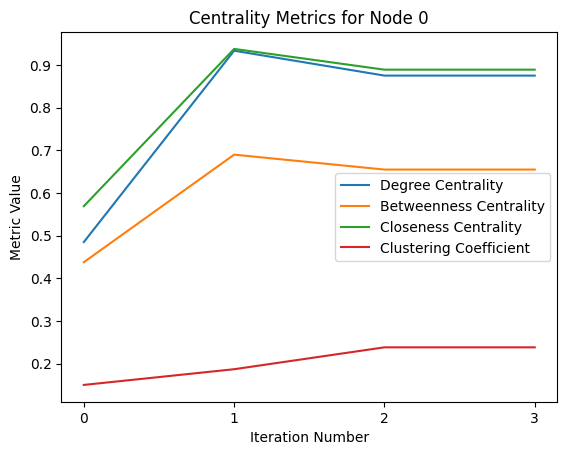

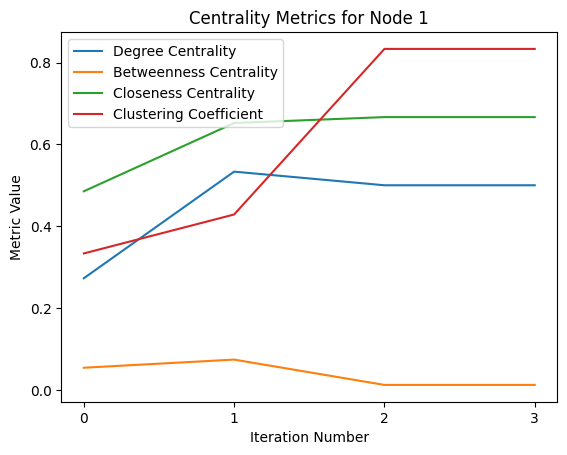

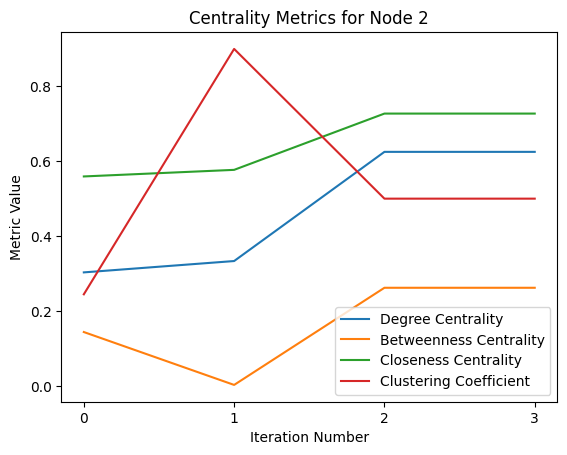

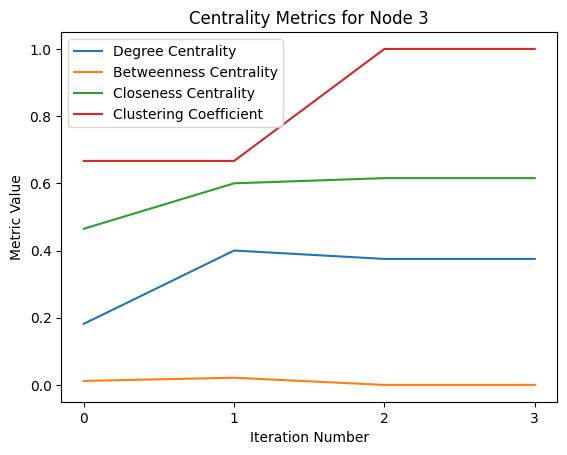

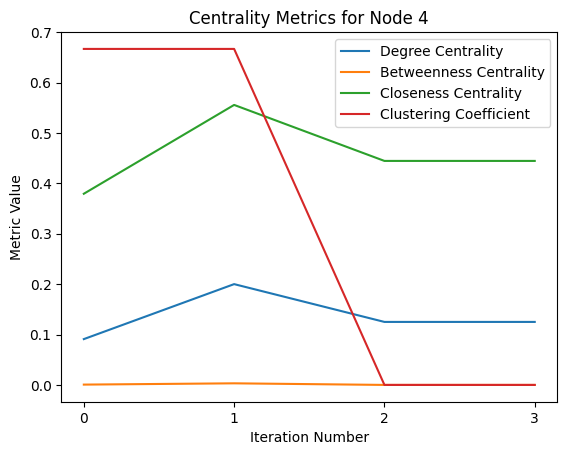

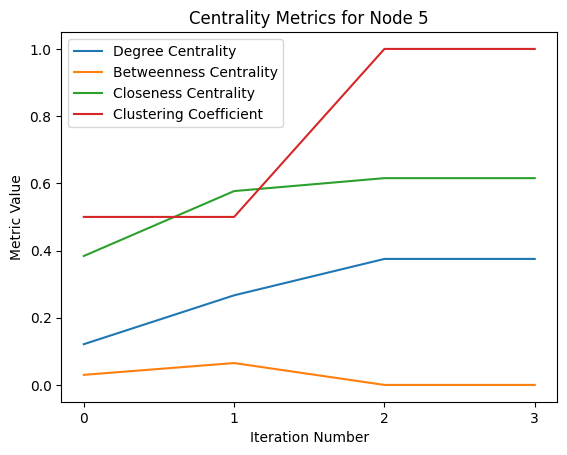

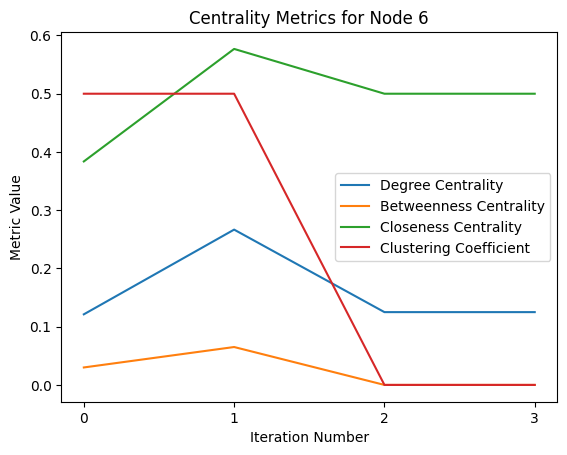

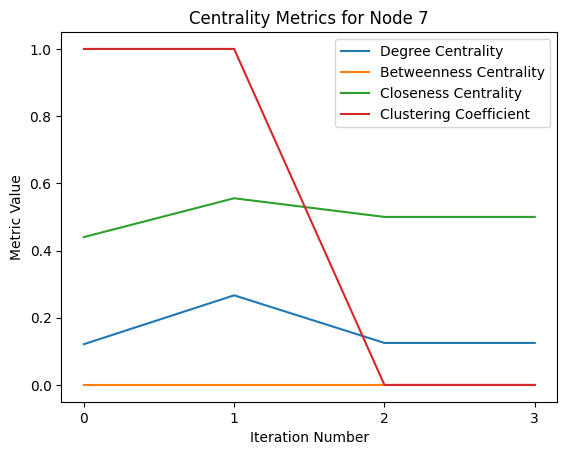

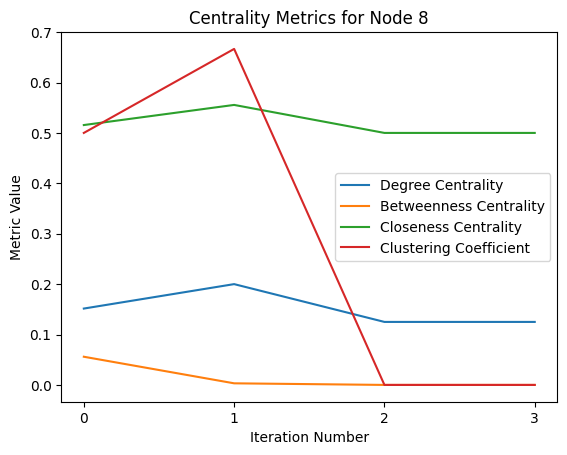

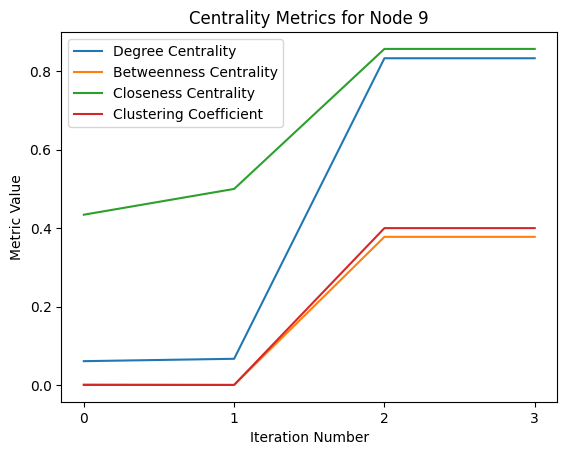

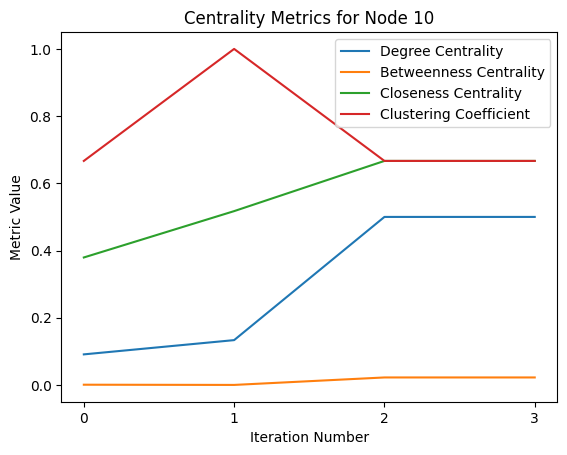

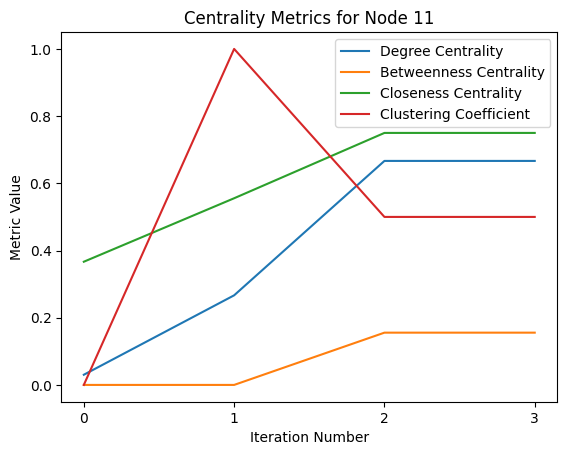

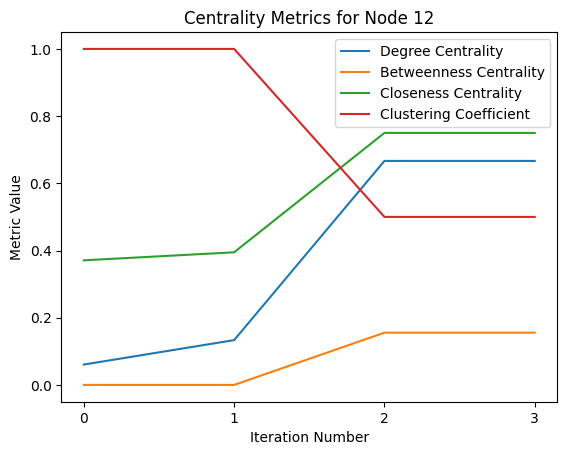

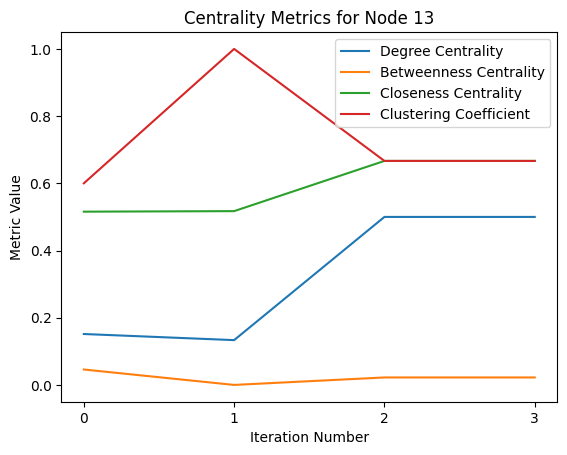

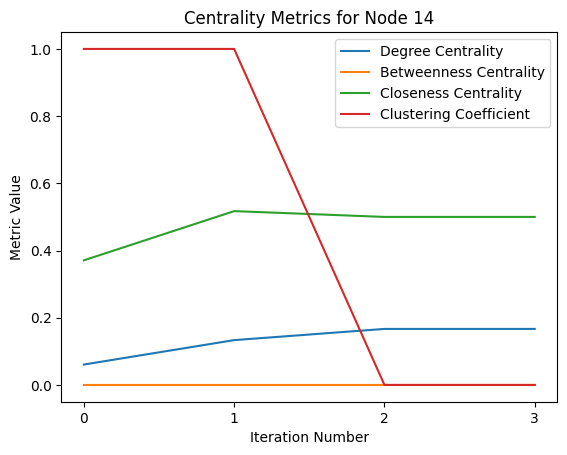

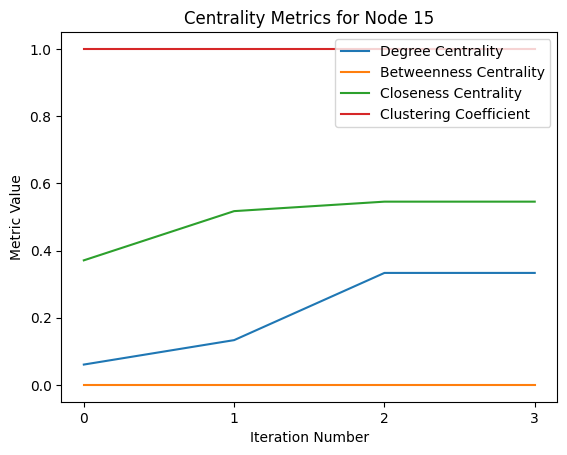

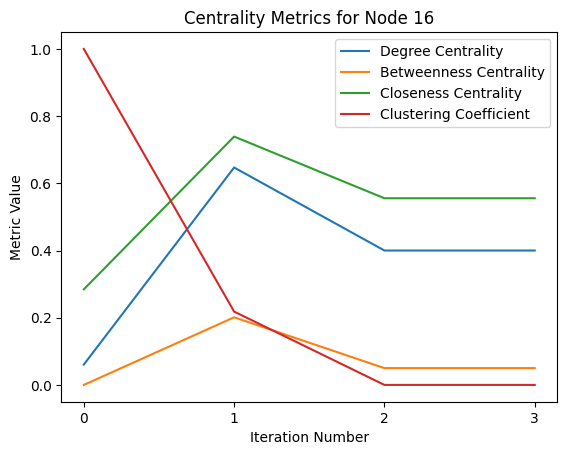

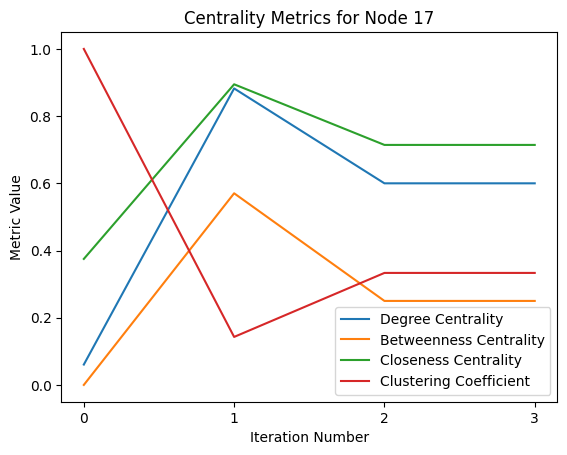

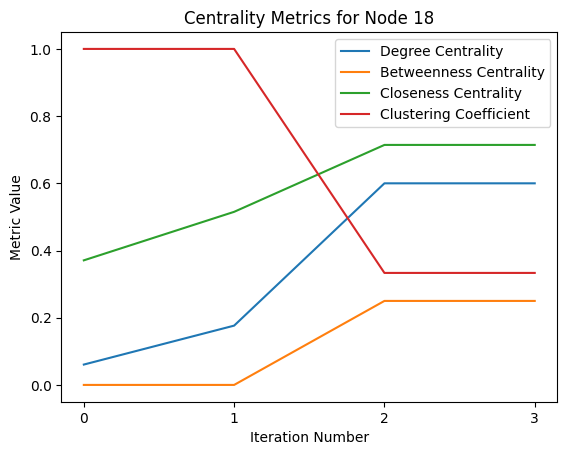

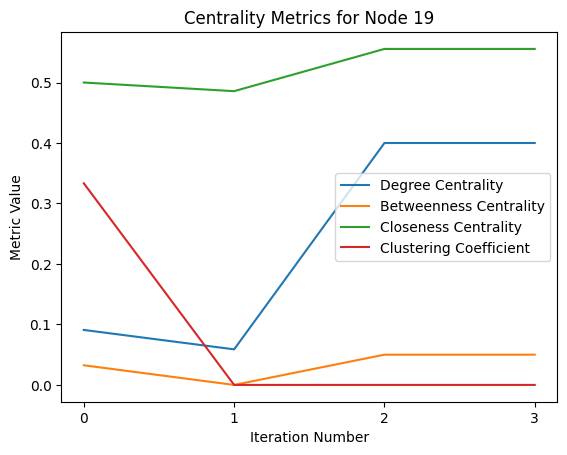

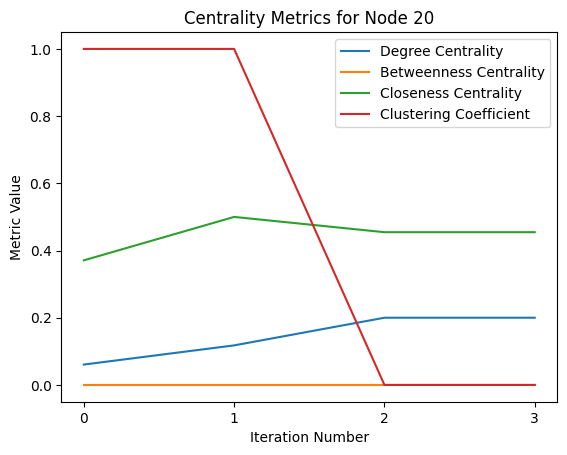

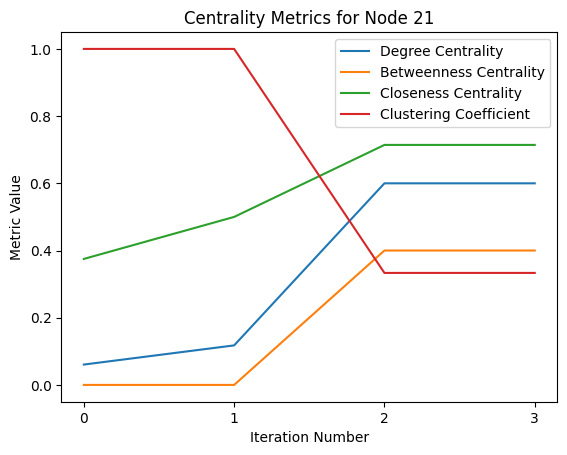

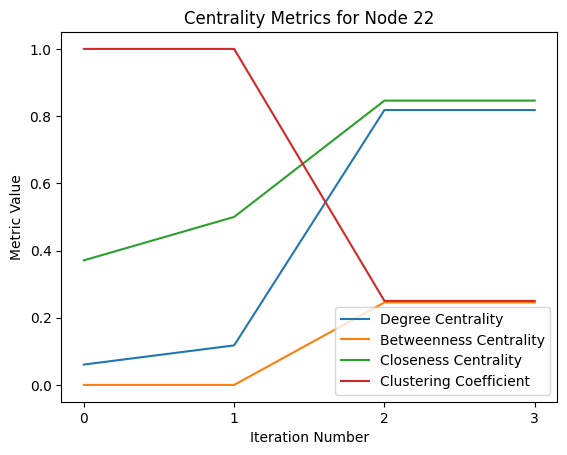

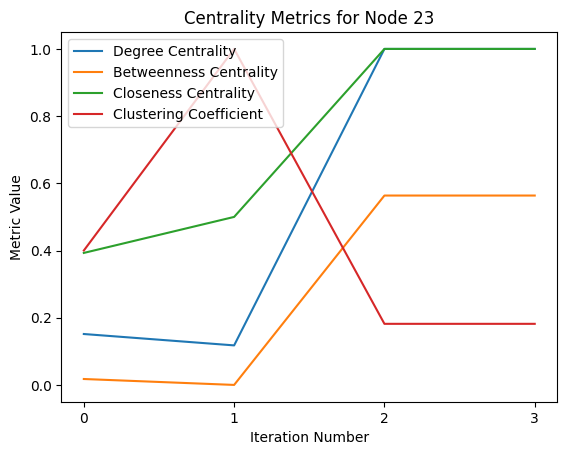

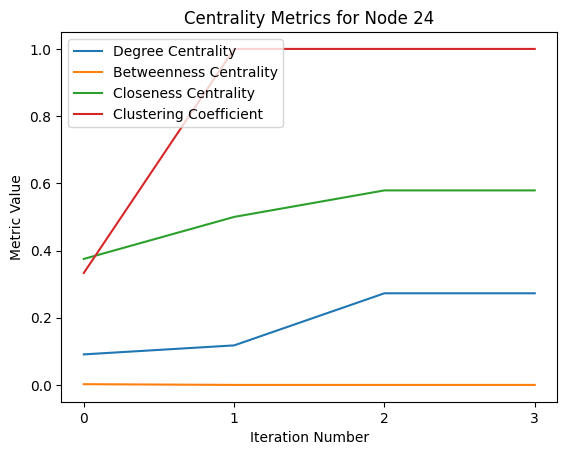

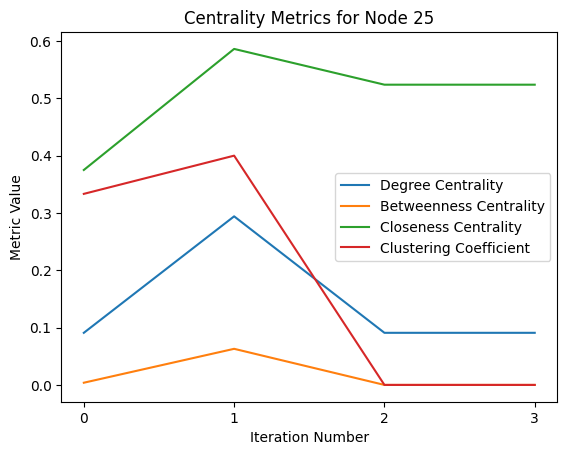

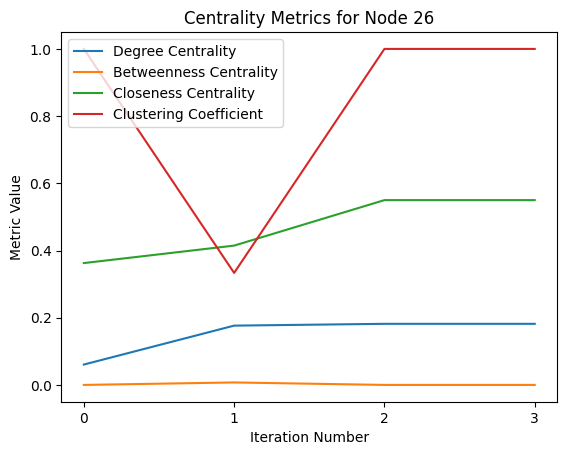

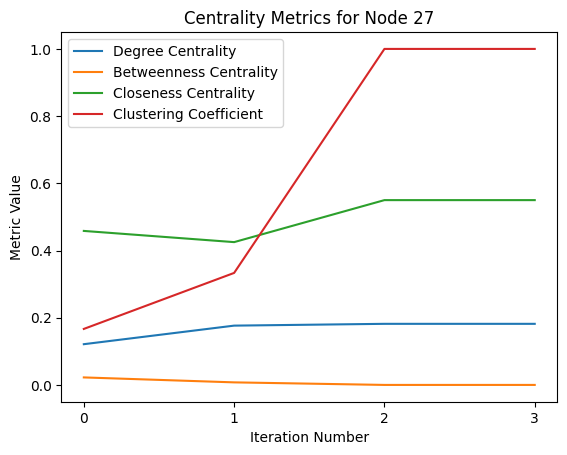

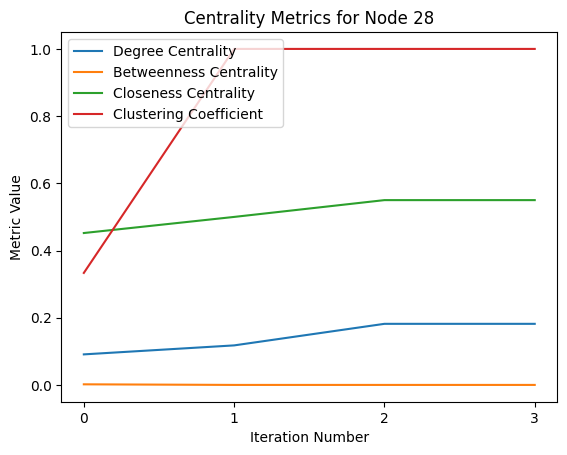

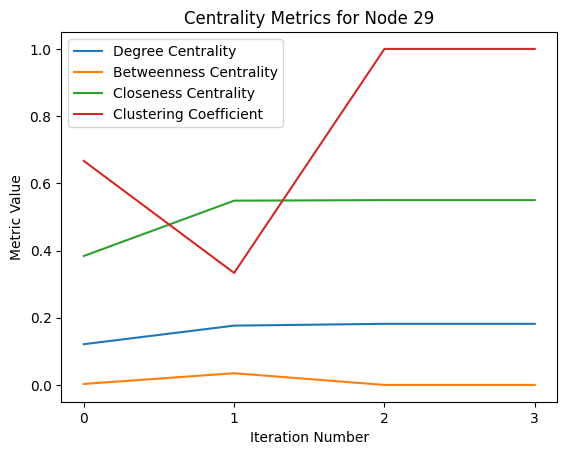

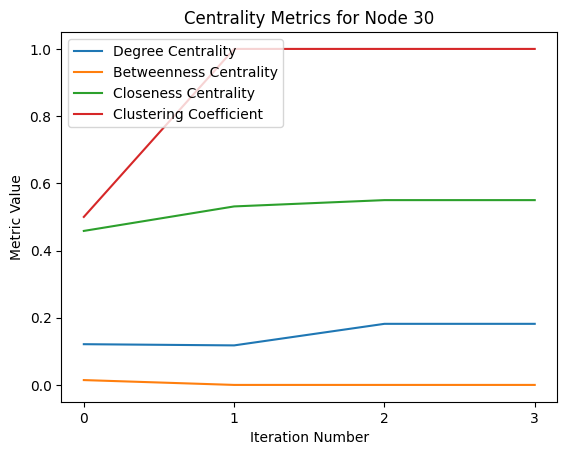

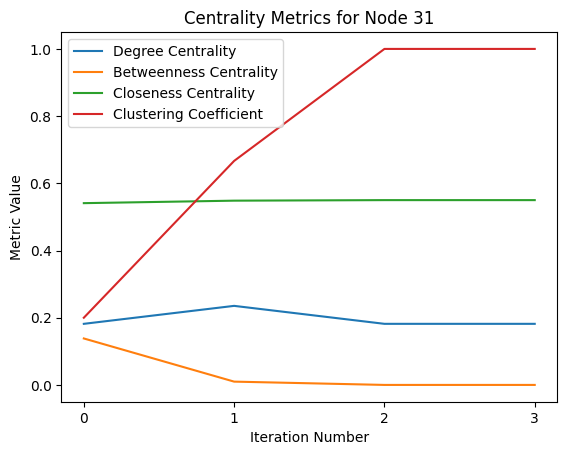

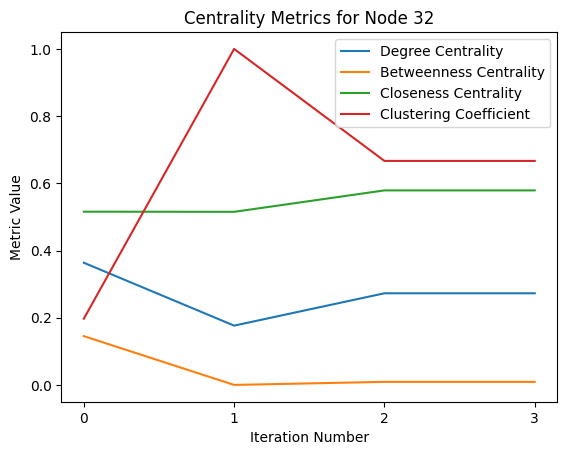

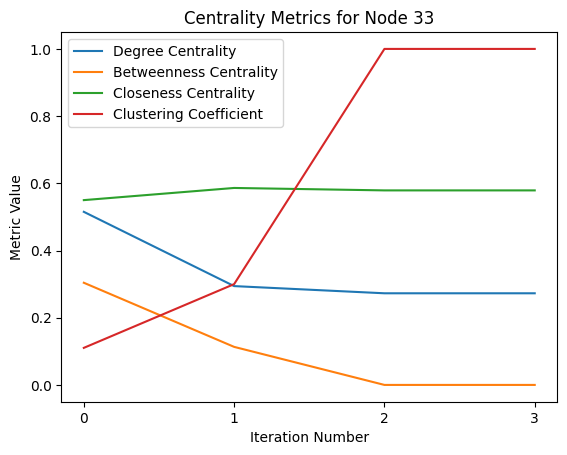

In [55]:
from matplotlib.ticker import MaxNLocator

node_count = G.number_of_nodes()
iterations = [i for i in range(iter + 1)]
print(iterations)
for i in range(node_count):
  deg_centrality_values = []
  betw_centrality_values = []
  close_centrality_values = []
  cluster_coefficient_values = []

  for j in deg_centrality.keys():
    deg_centrality_values.append(deg_centrality[j][i])
    betw_centrality_values.append(betw_centrality[j][i])
    close_centrality_values.append(close_centrality[j][i])
    cluster_coefficient_values.append(cluster_coefficient[j][i])

  plt.figure()
  ax = plt.gca()
  ax.xaxis.set_major_locator(MaxNLocator(integer=True))
  plt.plot(iterations, deg_centrality_values, label='Degree Centrality')
  plt.plot(iterations, betw_centrality_values, label='Betweenness Centrality')
  plt.plot(iterations, close_centrality_values, label='Closeness Centrality')
  plt.plot(iterations, cluster_coefficient_values, label='Clustering Coefficient')

  plt.title(f'Centrality Metrics for Node {i}')
  plt.xlabel('Iteration Number')
  plt.ylabel('Metric Value')
  plt.legend()
  plt.show()

The node_count variable gets the total number of nodes in the graph (in this case, 34), and iterations defines the values along the X-axis. Since iter holds the count of successful splits, this list will have all the states from the initial state to the final iteration. The MaxNLocator function is imported to ensure the X-axis values on the final plot are clean, whole integers, corresponding exactly to the iteration numbers.

The outer loop iterates through every node in the graph, and the inner loop iterates through the keys of the dictionaries of the 4 centrality measures (iteration number). The inner loop extracts the metric values for each node and and adds them to the corresponding lists.

These four lists are plotted along the y-axis as 4 different graphs along a common X-axis(iterations). The final output will result in the generation of 34 plots for each of the 34 points in the Karate Club Graph

### **Discussion**
The nodes that remain the most central are the first (Node 0) and the last(Node 34), which is not surprising because these are the nodes with the most connections. In fact, the algorithm separates the graph into 2 groups, one that's aligned with Node 0 and the other with Node 33. So, these 2 nodes retain a very high degree of influence and importance relative to others.

Degree centrality is the most stable among the four metrics. This is because it is a measure of local connectivity (the number of immediate neighbours) and for most nodes, a majority of their immediate neighbours will lie in the same cluster as theirs.

Betweenness centrality is defined as the number of instances a node lies in the shortest path between 2 other nodes. So, when a graph gets partitioned into clusters, the betweenness centrality value changes the most, especially for those nodes that connect multiple points, because paths that existed in G between 2 nodes have been cut-short or are no longer relevant within the context of the smaller communities.

Closeness centrality will increase for nodes in small, dense clusters since the average distance between nodes decreases as the clusters start getting smaller and denser. A node at the center of a small, dense cluster will naturally have a shorter average path length to every other node in that cluster, leading to an increase in its closeness centrality value.

Clustering coefficient values may increase or decrease depending on the nature of the node. Since this gives a fraction of a node's neighbours that are also connected to each other, values will increase for nodes that become part of dense clusters. Otherwise, they will remain stable or even decrease if they end up losing connections.



                      End Of Assignment
                      Rithik Menon - IMS24192